In [ ]:
from jax import random, grad, jit
import jax.numpy as jnp
from jax.typing import ArrayLike
from typing import Callable, List
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use("ggplot")

$$
\mathbf{x}_{i+1} = \mathbf{x}_i - \alpha \nabla f(\mathbf{x}_i)
$$

In [ ]:
def f(x: ArrayLike) -> ArrayLike:
    return ((x - 2) ** 2 + 1)

In [ ]:
x = jnp.linspace(-2, 8, 100)
y = f(x)

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$y$')]

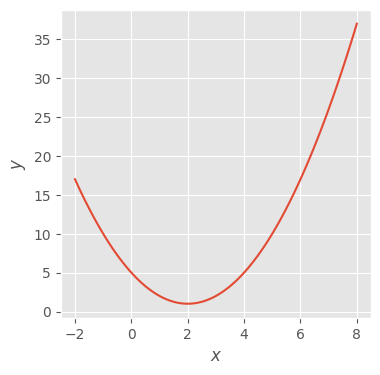

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, y)
ax.set(xlabel="$x$", ylabel="$y$")

In [ ]:
def sgd(f: Callable, n_iters: int, alpha: float, seed: int) -> ArrayLike:
    key = random.PRNGKey(seed)
    x = random.normal(key, shape=(1, 1))
    grad_f = grad(f)

    for i in range(n_iters):
        x = x - alpha * grad_f(x)
    return x

In [ ]:
def f_optim(x: ArrayLike) -> ArrayLike:
    return ((x - 2) ** 2 + 1).sum()

In [ ]:
x_sol = sgd(f_optim, n_iters=100, alpha=0.1, seed=0)

In [ ]:
x_sol

Array([[1.9999998]], dtype=float32)

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$y$')]

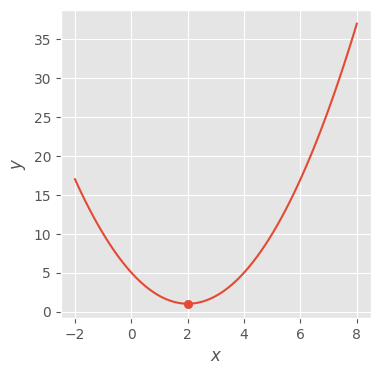

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, y)
ax.scatter(x_sol, f(x_sol))
ax.set(xlabel="$x$", ylabel="$y$")

In [ ]:
def sgd_track(f: Callable, n_iters: int, alpha: float, seed: int) -> List[ArrayLike]:
    key = random.PRNGKey(seed)
    xs = []
    x = random.normal(key, shape=(1, 1))
    xs.append(x)
    grad_f = grad(f)

    for i in range(n_iters):
        x = x - alpha * grad_f(x)
        xs.append(x)
    return jnp.concatenate(xs, axis=0)

In [ ]:
xs = sgd_track(f_optim, n_iters=100, alpha=1e-3, seed=0)

In [ ]:
xs

Array([[-0.20584226],
       [-0.20143057],
       [-0.19702771],
       [-0.19263366],
       [-0.1882484 ],
       [-0.1838719 ],
       [-0.17950416],
       [-0.17514515],
       [-0.17079486],
       [-0.16645327],
       [-0.16212037],
       [-0.15779613],
       [-0.15348053],
       [-0.14917357],
       [-0.14487523],
       [-0.14058548],
       [-0.1363043 ],
       [-0.1320317 ],
       [-0.12776764],
       [-0.1235121 ],
       [-0.11926508],
       [-0.11502655],
       [-0.1107965 ],
       [-0.1065749 ],
       [-0.10236175],
       [-0.09815703],
       [-0.09396072],
       [-0.0897728 ],
       [-0.08559325],
       [-0.08142207],
       [-0.07725923],
       [-0.07310471],
       [-0.0689585 ],
       [-0.06482058],
       [-0.06069094],
       [-0.05656956],
       [-0.05245642],
       [-0.04835151],
       [-0.04425481],
       [-0.0401663 ],
       [-0.03608596],
       [-0.03201379],
       [-0.02794976],
       [-0.02389386],
       [-0.01984607],
       [-0

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$y$')]

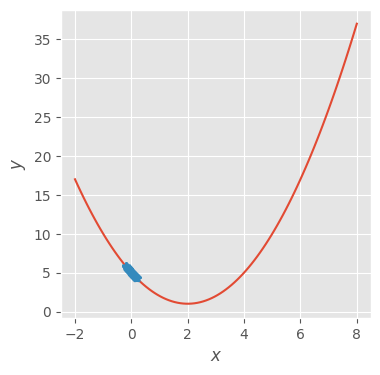

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, y)
ax.plot(xs, f(xs), "-*")
ax.set(xlabel="$x$", ylabel="$y$")

In [ ]:
key = random.PRNGKey(0)
key_x, key_y, key_w = random.split(key, 3)
x = random.uniform(key_x, shape=(1000, 1))
w = jnp.array([-1.5, 0.5]).reshape(-1, 1)
X_ones = jnp.concatenate([x, jnp.ones_like(x)], axis=1)
noise = random.normal(key_y, shape=(1000, 1)) * 0.2
y = X_ones @ w + noise

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$y$')]

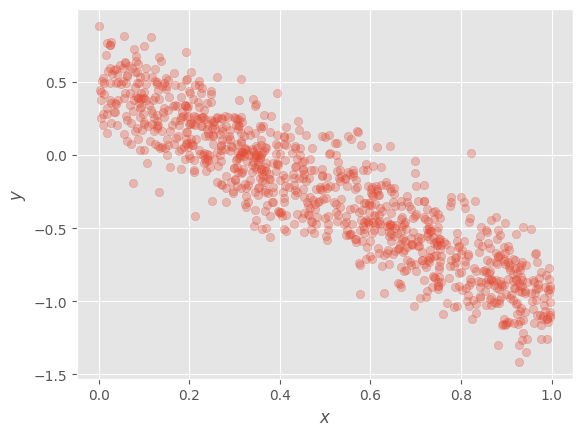

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.3)
ax.set(xlabel="$x$", ylabel="$y$")

In [ ]:
@jit
def predict(x: ArrayLike, w: ArrayLike) -> ArrayLike:
    X_ones = jnp.concatenate([x, jnp.ones_like(x)], axis=1)
    y_pred = X_ones @ w
    return y_pred

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{N}\sum_{i} (y_i - \mathbf{x}_i \mathbf{w}) ^ 2
$$

In [ ]:
@jit
def loss(x: ArrayLike, y: ArrayLike, w: ArrayLike) -> ArrayLike:
    y_pred = predict(x, w)
    loss_val = ((y - y_pred) ** 2).mean()
    return loss_val

In [ ]:
grad_f = jit(grad(loss, argnums=2))

In [ ]:
w = random.normal(key_w, shape=(2, 1))

In [ ]:
N_ITERS = 1000
ALPHA = 0.1

In [ ]:
for _ in range(N_ITERS):
    w = w - ALPHA * grad_f(x, y, w)

In [ ]:
w

Array([[-1.5210711],
       [ 0.5014857]], dtype=float32)

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$y$')]

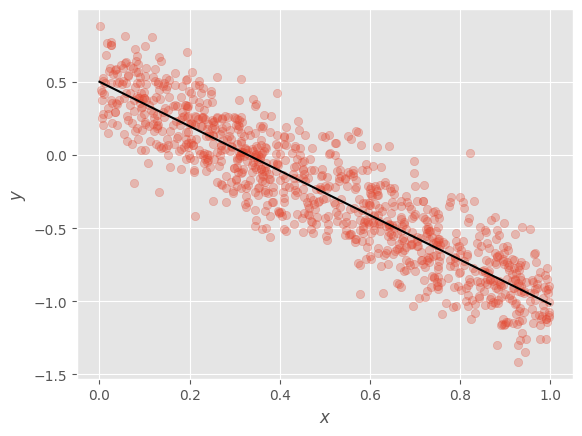

In [ ]:
x_range = jnp.linspace(0, 1, 10).reshape(-1, 1)
y_pred = predict(x_range, w)
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.3)
ax.plot(x_range, y_pred, color="k")
ax.set(xlabel="$x$", ylabel="$y$")

$$
\tilde{\mathbf{y}} = \frac{1}{1 + e ^ {\mathbf{X} \mathbf{w}}}
$$

In [ ]:
@jit
def predict(X: ArrayLike, w: ArrayLike) -> ArrayLike:
    X_ones = jnp.concatenate(
        [X, jnp.ones((X.shape[0], 1), dtype=X.dtype)],
        axis=1
        )
    return 1 / (1 + jnp.exp(X_ones @ w))

$$
\mathcal{L}(\mathbf{w}) = -\frac{1}{N} \sum_i y_i \log{\tilde{y_i}} + (1 - y_i) \log{(1 - \tilde{y_i})}
$$

In [ ]:
jnp.log(0.0001)

Array(-9.2103405, dtype=float32, weak_type=True)

In [ ]:
@jit
def loss(X: ArrayLike, y: ArrayLike, w: ArrayLike) -> ArrayLike:
    y_pred = predict(X, w)
    loss_val = -(
        y * jnp.log(y_pred) +
        (1 - y) * jnp.log(1 - y_pred)
    ).mean()
    return loss_val

In [ ]:
grad_f = jit(grad(loss, argnums=2))

In [ ]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=0)
X = jnp.array(X)
y = jnp.array(y).reshape(-1, 1)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

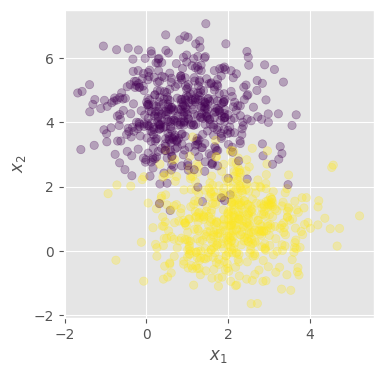

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3)
ax.set(xlabel="$x_1$", ylabel="$x_2$")

In [ ]:
N_ITERS = 1000
ALPHA = 0.1

In [ ]:
key = random.PRNGKey(0)
w = random.normal(key, shape=(3, 1))

In [ ]:
y_pred = predict(X, w)

In [ ]:
for _ in range(N_ITERS):
    w = w - ALPHA * grad_f(X, y, w)

In [ ]:
y_pred = predict(X, w)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

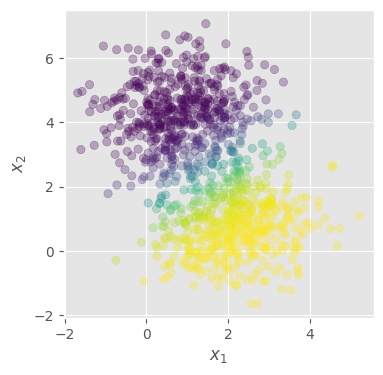

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.3)
ax.set(xlabel="$x_1$", ylabel="$x_2$")

In [ ]:
x_1 = jnp.linspace(-2, 6, 100)
x_2 = jnp.linspace(-2, 8, 100)
X1, X2 = jnp.meshgrid(x_1, x_2)
X_grid = jnp.concatenate([X1.reshape(-1, 1), X2.reshape(-1, 1)], axis=1)
y_grid = predict(X_grid, w)
Y_grid = y_grid.reshape(X1.shape)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

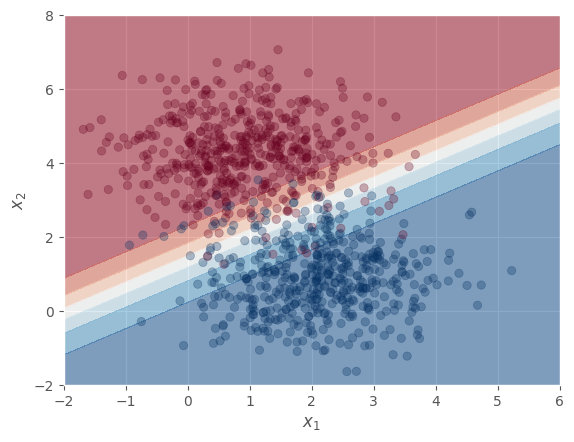

In [ ]:
fig, ax = plt.subplots()
ax.contourf(X1, X2, Y_grid, cmap="RdBu", alpha=0.5)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", alpha=0.3)
ax.set(xlabel="$x_1$", ylabel="$x_2$")